# 1. Import

In [748]:
import pandas as pd
import numpy as np

import missingno as msno

In [749]:
import matplotlib.font_manager as fm
import matplotlib as mpl
font_path = './NanumGothicLight.otf'
fm.fontManager.addfont(font_path) 
mpl.rcParams['font.family'] = 'NanumGothicOTF'
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# 2. Data

In [750]:
path_train = "/workspace/Storage/template_structured/Data/raw/train.csv"
path_test = "/workspace/Storage/template_structured/Data/raw/test.csv"


In [751]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

# 3. Objective

EDA

# 4. Analysis

## 4.1 overview

In [752]:
train.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [753]:
train.head(1)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0


<Axes: >

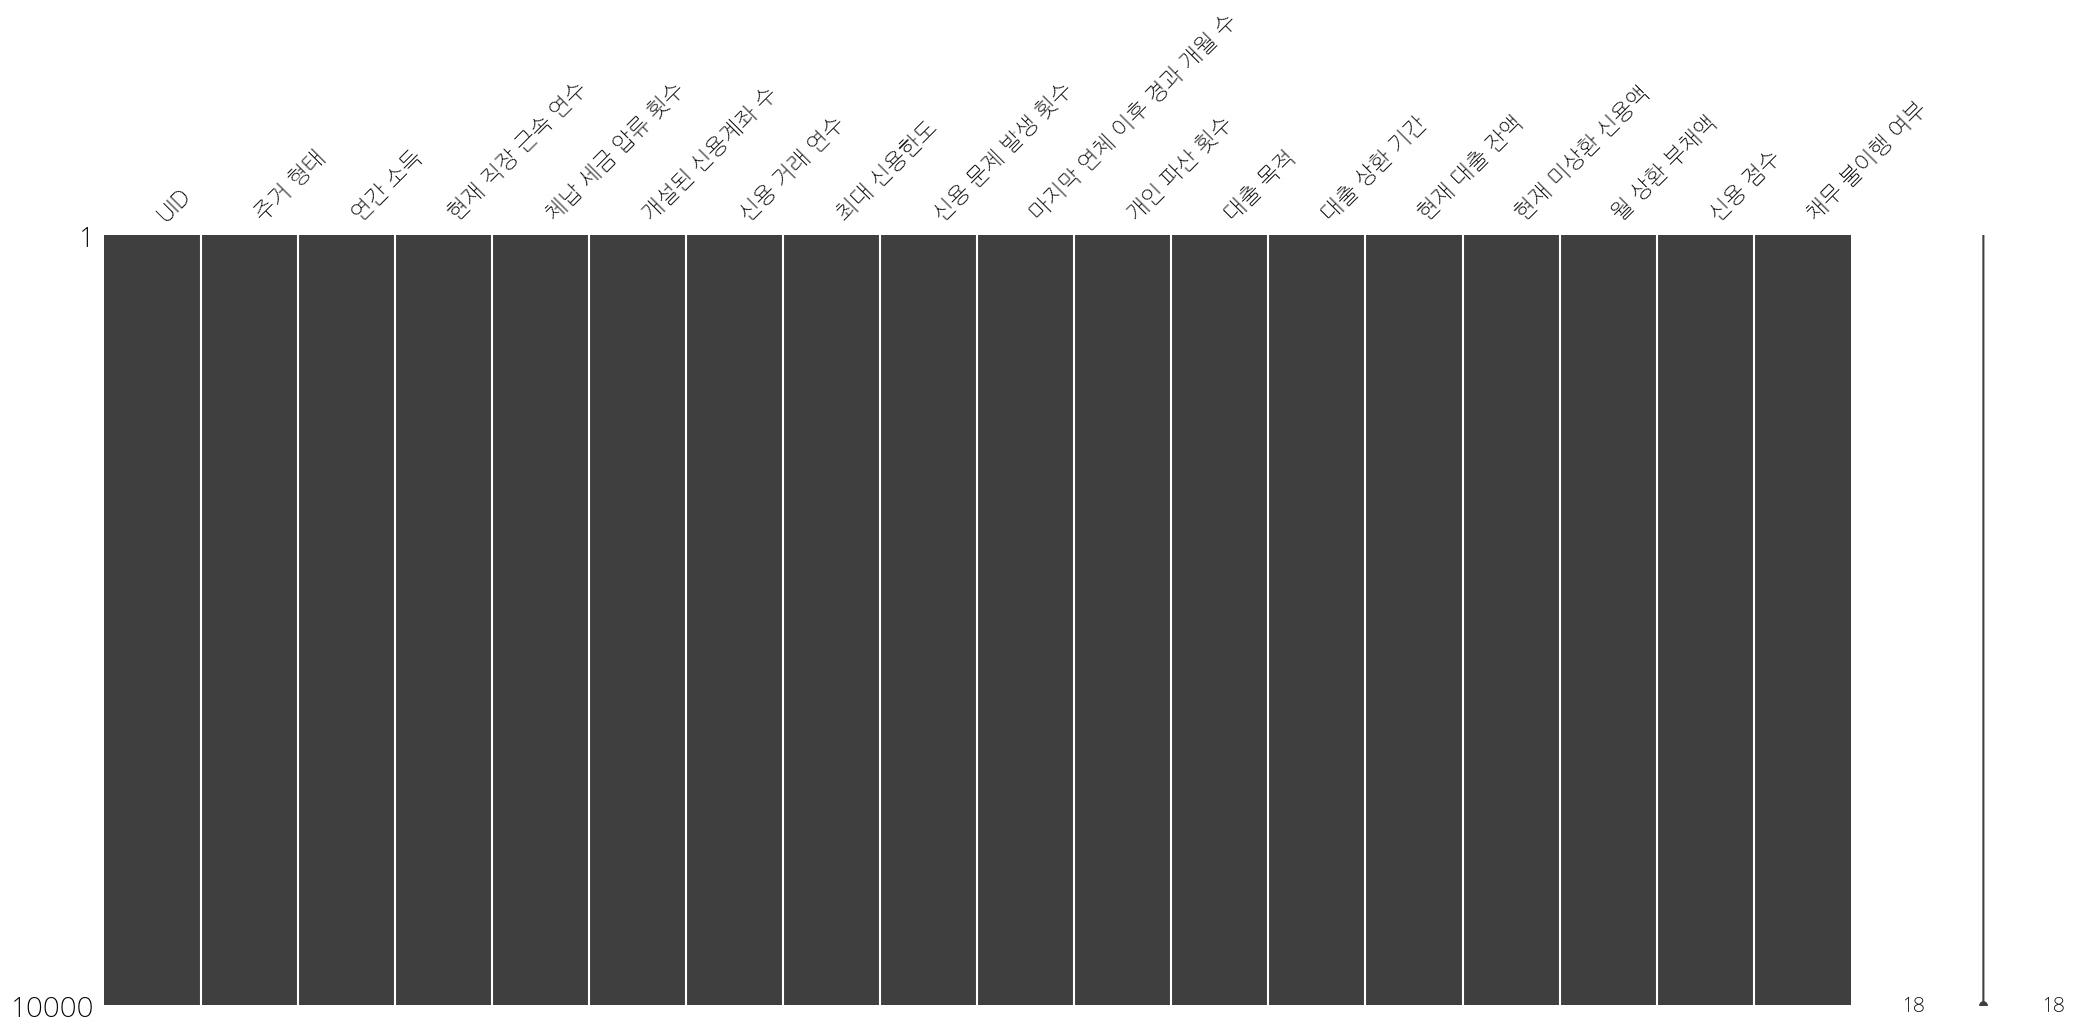

In [754]:
msno.matrix(train)

<Axes: >

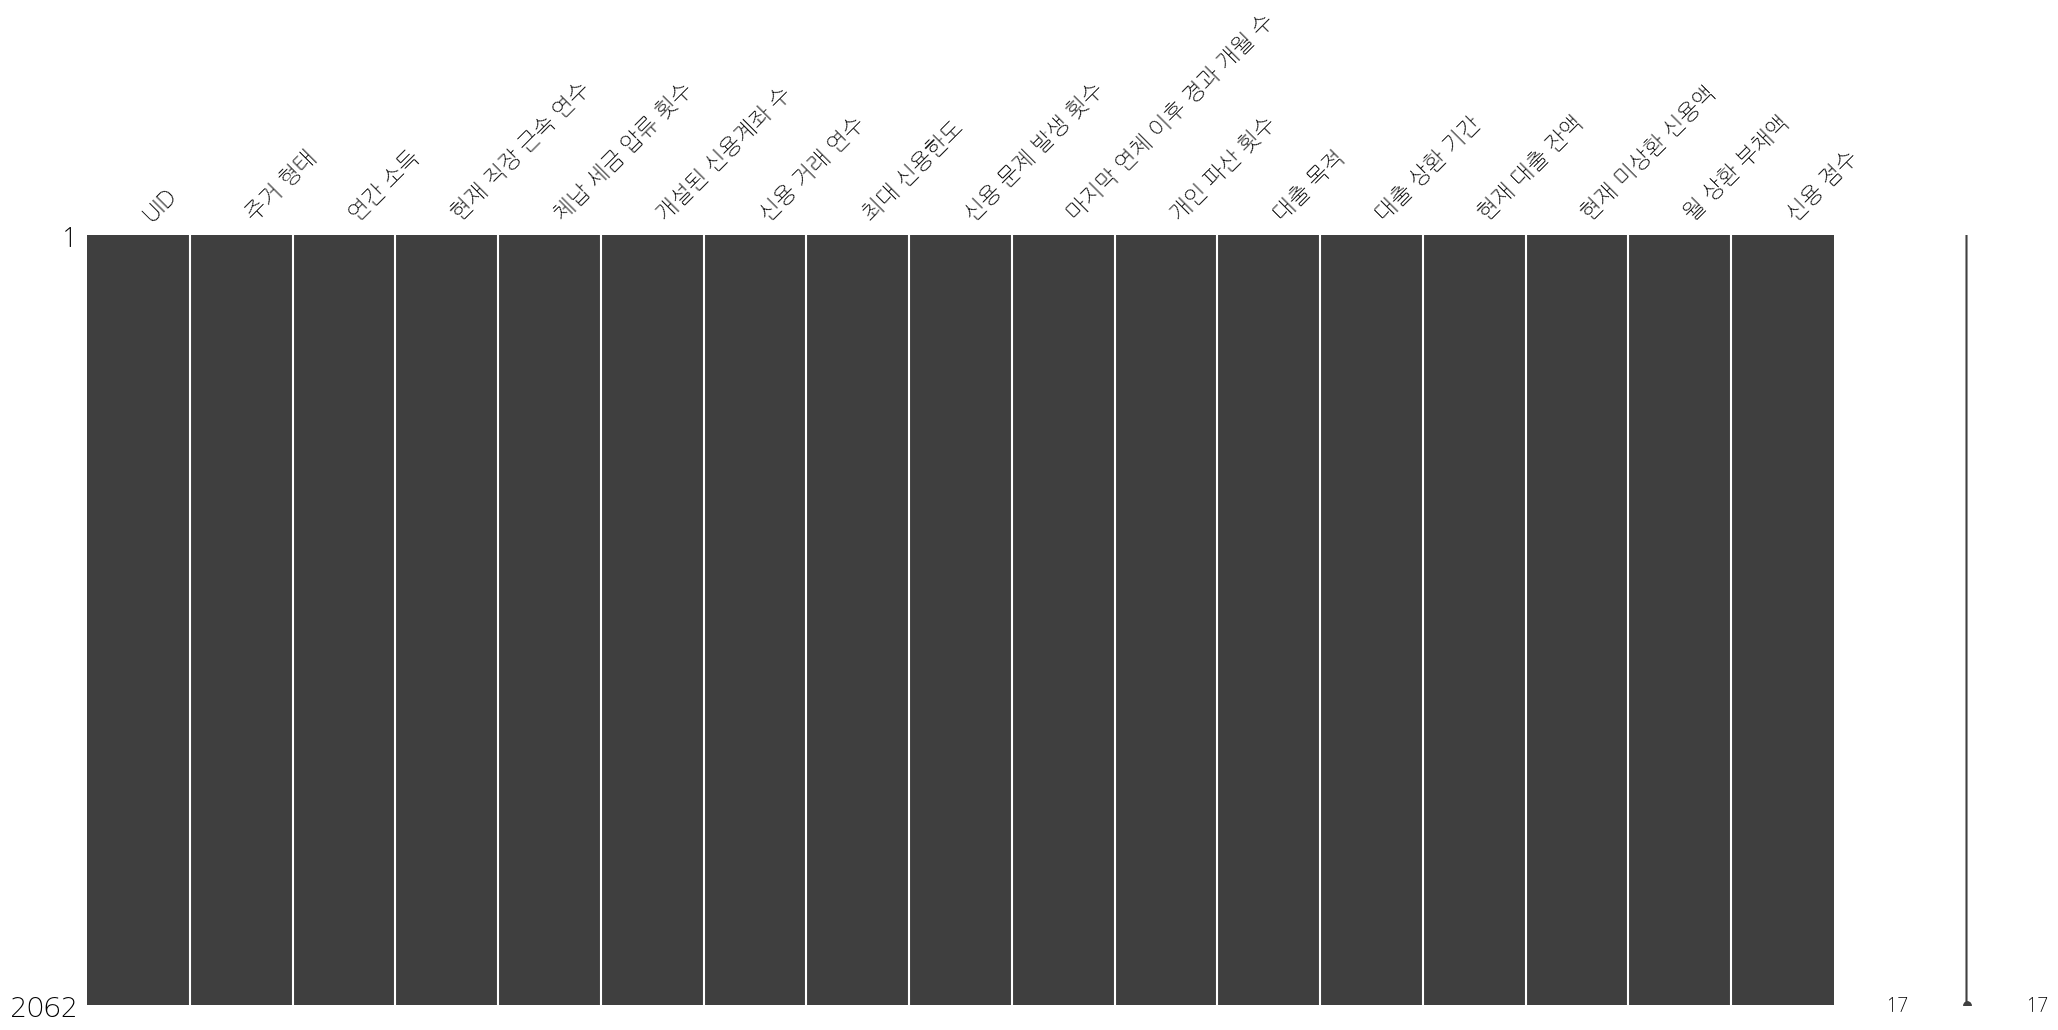

In [755]:
msno.matrix(test)

In [756]:
train.shape, test.shape

((10000, 18), (2062, 17))

## 4.2 Univariable Analysis

In [757]:
output = {}
for col in train.columns:
    output[col] = {
        "type": "",
        "missingratio": -1,
        "describe":{}
    }

In [758]:
output

{'UID': {'type': '', 'missingratio': -1, 'describe': {}},
 '주거 형태': {'type': '', 'missingratio': -1, 'describe': {}},
 '연간 소득': {'type': '', 'missingratio': -1, 'describe': {}},
 '현재 직장 근속 연수': {'type': '', 'missingratio': -1, 'describe': {}},
 '체납 세금 압류 횟수': {'type': '', 'missingratio': -1, 'describe': {}},
 '개설된 신용계좌 수': {'type': '', 'missingratio': -1, 'describe': {}},
 '신용 거래 연수': {'type': '', 'missingratio': -1, 'describe': {}},
 '최대 신용한도': {'type': '', 'missingratio': -1, 'describe': {}},
 '신용 문제 발생 횟수': {'type': '', 'missingratio': -1, 'describe': {}},
 '마지막 연체 이후 경과 개월 수': {'type': '', 'missingratio': -1, 'describe': {}},
 '개인 파산 횟수': {'type': '', 'missingratio': -1, 'describe': {}},
 '대출 목적': {'type': '', 'missingratio': -1, 'describe': {}},
 '대출 상환 기간': {'type': '', 'missingratio': -1, 'describe': {}},
 '현재 대출 잔액': {'type': '', 'missingratio': -1, 'describe': {}},
 '현재 미상환 신용액': {'type': '', 'missingratio': -1, 'describe': {}},
 '월 상환 부채액': {'type': '', 'missingratio': -1, 'd

### 4.2.1 UID

In [759]:
col = "UID"

In [760]:
train[col].value_counts()

UID
TRAIN_09999    1
TRAIN_00000    1
TRAIN_00001    1
TRAIN_00002    1
TRAIN_00003    1
              ..
TRAIN_00019    1
TRAIN_00020    1
TRAIN_00021    1
TRAIN_00022    1
TRAIN_00023    1
Name: count, Length: 10000, dtype: int64

In [761]:
def preprocess_uid_formatting(x):
    return int(x.replace("TRAIN_", ""))

In [762]:
processed = train[col].apply(preprocess_uid_formatting)
processed.head()

0    0
1    1
2    2
3    3
4    4
Name: UID, dtype: int64

<Axes: ylabel='Frequency'>

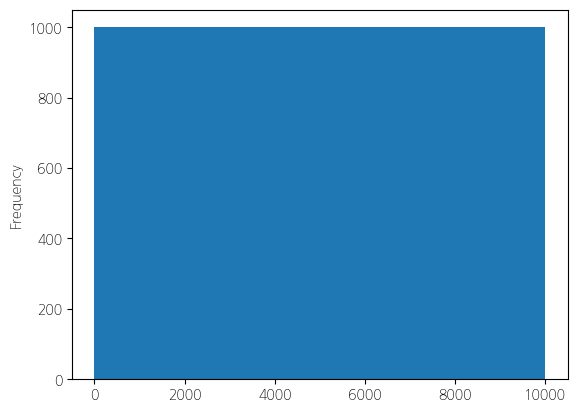

In [763]:
processed.plot(kind='hist', bins=10)

In [764]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [765]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 4999.5,
 'std': 2886.8956799071675,
 'min': 0.0,
 '25%': 2499.75,
 '50%': 4999.5,
 '75%': 7499.25,
 'max': 9999.0}

In [766]:
output[col]['type'] = "interval"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

In [767]:
processed.to_list() == list(range(len(train)))

True

### 4.2.2 주거 형태

In [768]:
col = "주거 형태"

In [769]:
train[col].value_counts()

주거 형태
월세                  4050
주택 담보 대출 (거주 중)     3633
자가                  2241
주택 담보 대출 (비거주 중)      76
Name: count, dtype: int64

In [770]:
def preprocess_housetype_formatting(x):
    return x

In [771]:
processed = train[col].apply(preprocess_housetype_formatting)
processed.head()

0    자가
1    월세
2    월세
3    월세
4    월세
Name: 주거 형태, dtype: object

<Axes: xlabel='주거 형태'>

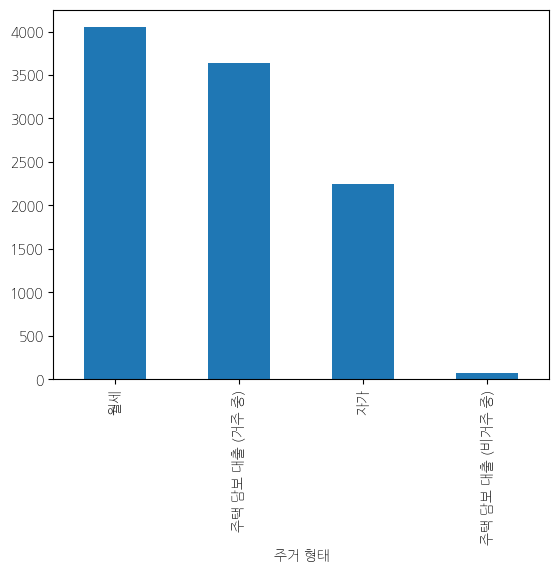

In [772]:
processed.value_counts().plot(kind='bar')

In [773]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [774]:
desc = processed.describe().to_dict()
desc

{'count': 10000, 'unique': 4, 'top': '월세', 'freq': 4050}

In [775]:
output[col]['type'] = "nominal"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.3 연간 소득

In [776]:
col = "연간 소득"

In [777]:
train[col].value_counts()

연간 소득
1423732.5    2
1633566.0    2
1032717.0    2
2082741.0    2
1038826.5    2
            ..
2008419.0    1
2901906.0    1
1606006.5    1
1409605.5    1
3551742.0    1
Name: count, Length: 9970, dtype: int64

In [778]:
def preprocess_yearincome_formatting(x):
    return x

In [779]:
processed = train[col].apply(preprocess_yearincome_formatting)
processed.head()

0    1941337.5
1    1979505.0
2    1356381.0
3    1049017.5
4    4320217.5
Name: 연간 소득, dtype: float64

<Axes: ylabel='Frequency'>

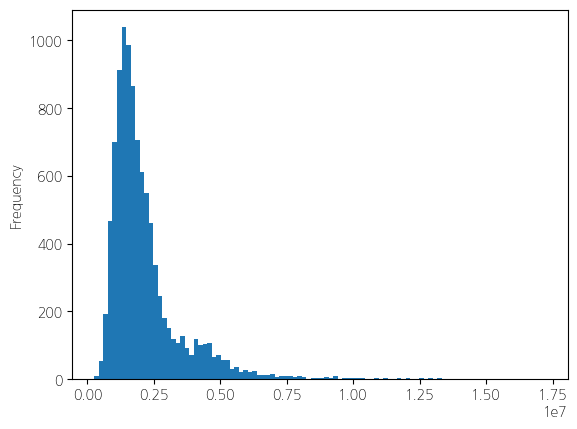

In [780]:
processed.plot(kind='hist', bins=100)

In [781]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [782]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 2163958.88415,
 'std': 1434429.6819599683,
 'min': 267621.0,
 '25%': 1311437.25,
 '50%': 1743222.75,
 '75%': 2447664.0,
 'max': 17229747.0}

In [783]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.4 현재 직장 근속 연수

In [784]:
col = "현재 직장 근속 연수"

In [785]:
train[col].value_counts()

현재 직장 근속 연수
10년 이상    3828
2년        1225
8년         841
5년         729
7년         619
1년         581
4년         541
3년         523
1년 미만      488
6년         357
9년         268
Name: count, dtype: int64

In [786]:
import re

def preprocess_tenure_formatting(x):
    return int(re.findall(r'\d+', x)[0])

In [787]:
processed = train[col].apply(preprocess_tenure_formatting)
processed.head()

0    10
1    10
2     4
3     6
4     2
Name: 현재 직장 근속 연수, dtype: int64

<Axes: ylabel='Frequency'>

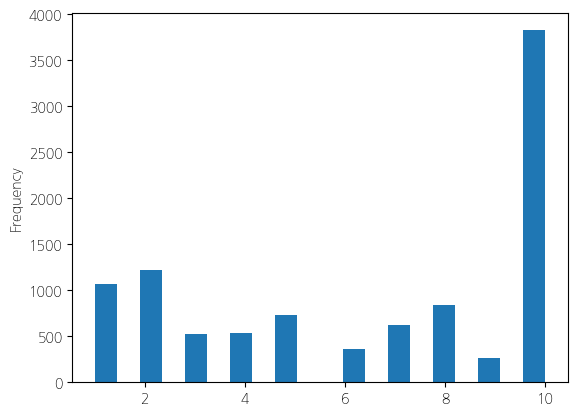

In [788]:
processed.plot(kind='hist', bins=20)

In [789]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [790]:
desc = processed.map(str).describe().to_dict()
desc

{'count': 10000, 'unique': 10, 'top': '10', 'freq': 3828}

In [791]:
output[col]['type'] = "ordinal"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.5 체납 세금 압류 횟수

In [792]:
col = "체납 세금 압류 횟수"

In [793]:
train[col].value_counts()

체납 세금 압류 횟수
0.0    8826
1.0     884
4.0     176
2.0      60
5.0      37
7.0      10
3.0       4
6.0       3
Name: count, dtype: int64

In [794]:
def preprocess_seizurecount_formatting(x):
    return x

In [795]:
processed = train[col].apply(preprocess_seizurecount_formatting)
processed.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 체납 세금 압류 횟수, dtype: float64

<Axes: ylabel='Frequency'>

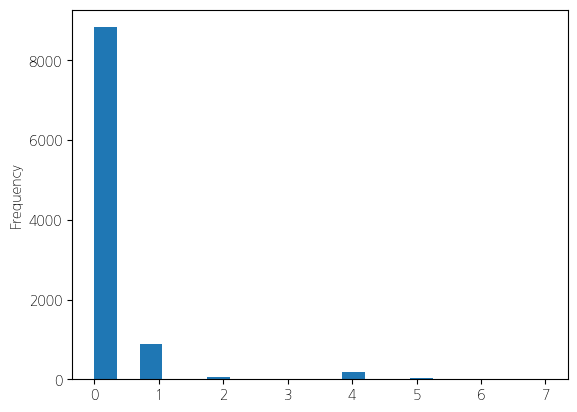

In [796]:
processed.plot(kind='hist', bins=20)

In [797]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [798]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 0.1993,
 'std': 0.7143042300401877,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 0.0,
 'max': 7.0}

In [799]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.6 개설된 신용계좌 수

In [800]:
col = "개설된 신용계좌 수"

In [801]:
train[col].value_counts().head()

개설된 신용계좌 수
12    981
10    973
11    950
13    896
9     869
Name: count, dtype: int64

In [802]:
def preprocess_accountcount_formatting(x):
    return x

In [803]:
processed = train[col].apply(preprocess_accountcount_formatting)
processed.head()

0     9
1     5
2    12
3    15
4    11
Name: 개설된 신용계좌 수, dtype: int64

<Axes: ylabel='Frequency'>

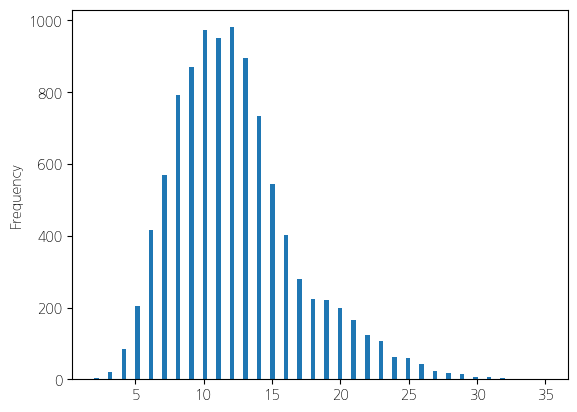

In [804]:
processed.plot(kind='hist', bins=100)

In [805]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [806]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 12.2489,
 'std': 4.620571799937302,
 'min': 2.0,
 '25%': 9.0,
 '50%': 12.0,
 '75%': 15.0,
 'max': 35.0}

In [807]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.7 신용 거래 연수

In [808]:
col = "신용 거래 연수"

In [809]:
train[col].value_counts()

신용 거래 연수
15.5    94
14.3    93
15.8    92
16.2    92
15.2    85
        ..
46.7     1
6.0      1
41.8     1
48.7     1
6.7      1
Name: count, Length: 397, dtype: int64

In [810]:
def preprocess_credityear_formatting(x):
    return x

In [811]:
processed = train[col].apply(preprocess_credityear_formatting)
processed.head()

0    13.4
1    15.1
2    18.8
3    14.8
4    26.1
Name: 신용 거래 연수, dtype: float64

<Axes: ylabel='Frequency'>

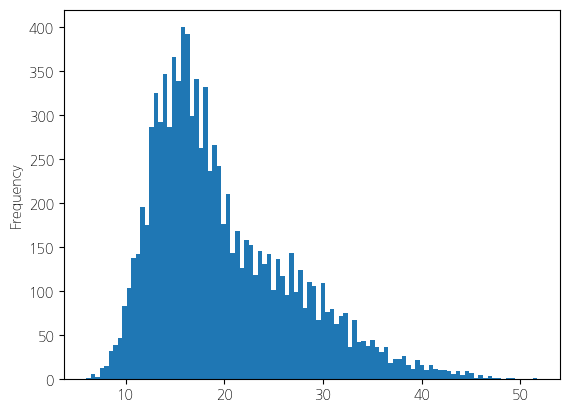

In [812]:
processed.plot(kind='hist', bins=100)

In [813]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [814]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 19.879360000000002,
 'std': 7.2066928360075995,
 'min': 6.0,
 '25%': 14.6,
 '50%': 17.95,
 '75%': 24.1,
 'max': 51.7}

In [815]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.8 최대 신용한도

In [816]:
col = "최대 신용한도"

In [817]:
train[col].value_counts()

최대 신용한도
0.0          388
63549.0        2
689334.0       2
681205.5       2
1092354.0      2
            ... 
4069552.5      1
1339857.0      1
1381129.5      1
642313.5       1
1105492.5      1
Name: count, Length: 9585, dtype: int64

In [818]:
def preprocess_creditlimit_formatting(x):
    return x

In [819]:
processed = train[col].apply(preprocess_creditlimit_formatting)
processed.head()

0    400597.5
1    360679.5
2    491770.5
3    411546.0
4    895288.5
Name: 최대 신용한도, dtype: float64

<Axes: ylabel='Frequency'>

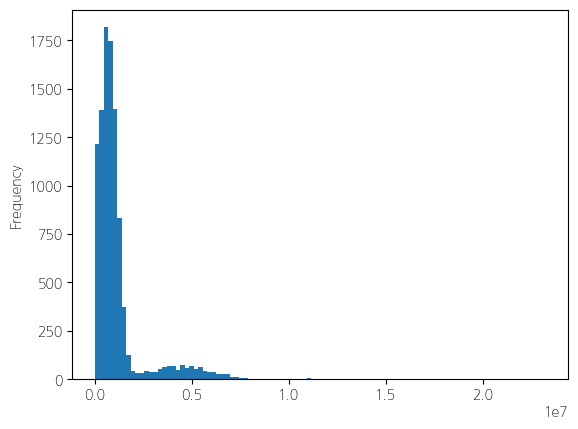

In [820]:
processed.plot(kind='hist', bins=100)

In [821]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [822]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 1175264.7378,
 'std': 1604199.2152022778,
 'min': 0.0,
 '25%': 448247.625,
 '50%': 767091.0,
 '75%': 1147282.875,
 'max': 23232333.0}

In [823]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.9 신용 문제 발생 횟수

In [824]:
col = "신용 문제 발생 횟수"

In [825]:
train[col].value_counts()

신용 문제 발생 횟수
0    6621
1    2149
2     689
5     248
6     157
4      93
3      30
7      13
Name: count, dtype: int64

In [826]:
def preprocess_creditissuecount_formatting(x):
    return x

In [827]:
processed = train[col].apply(preprocess_creditissuecount_formatting)
processed.head()

0    0
1    0
2    1
3    1
4    0
Name: 신용 문제 발생 횟수, dtype: int64

<Axes: ylabel='Frequency'>

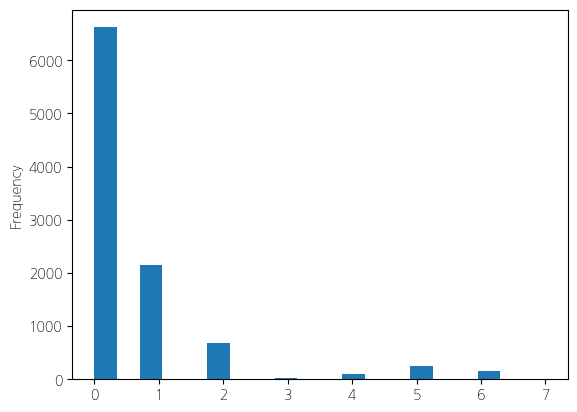

In [828]:
processed.plot(kind='hist', bins=20)

In [829]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [830]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 0.6262,
 'std': 1.23419037534258,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 1.0,
 'max': 7.0}

In [831]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.10 마지막 연체 이후 경과 개월 수

In [832]:
col = "마지막 연체 이후 경과 개월 수"

In [833]:
train[col].value_counts()

마지막 연체 이후 경과 개월 수
11    262
9     258
31    252
8     251
10    251
     ... 
83      7
85      3
84      3
86      3
88      1
Name: count, Length: 88, dtype: int64

In [834]:
def preprocess_delinquencyfrom_formatting(x):
    return x

In [835]:
processed = train[col].apply(preprocess_delinquencyfrom_formatting)
processed.head()

0    24
1    11
2    74
3    22
4    32
Name: 마지막 연체 이후 경과 개월 수, dtype: int64

<Axes: ylabel='Frequency'>

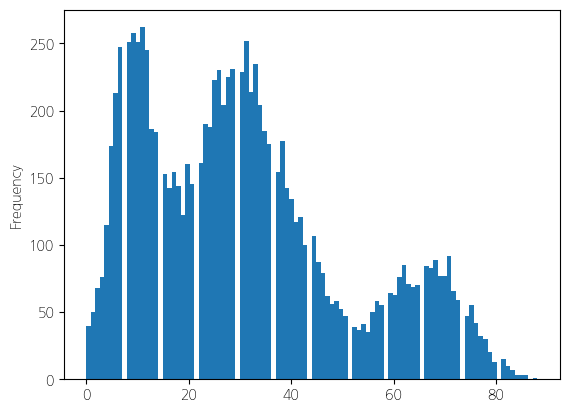

In [836]:
processed.plot(kind='hist', bins=100)

In [837]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [838]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 30.8892,
 'std': 20.01156089906436,
 'min': 0.0,
 '25%': 14.0,
 '50%': 28.0,
 '75%': 41.0,
 'max': 88.0}

In [839]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.11 개인 파산 횟수

In [840]:
col = "개인 파산 횟수"

In [841]:
train[col].value_counts()

개인 파산 횟수
0    7886
1    1268
3     772
2      74
Name: count, dtype: int64

In [842]:
def preprocess_bankruptcycount_formatting(x):
    return x

In [843]:
processed = train[col].apply(preprocess_bankruptcycount_formatting)
processed.head()

0    1
1    0
2    3
3    1
4    0
Name: 개인 파산 횟수, dtype: int64

<Axes: ylabel='Frequency'>

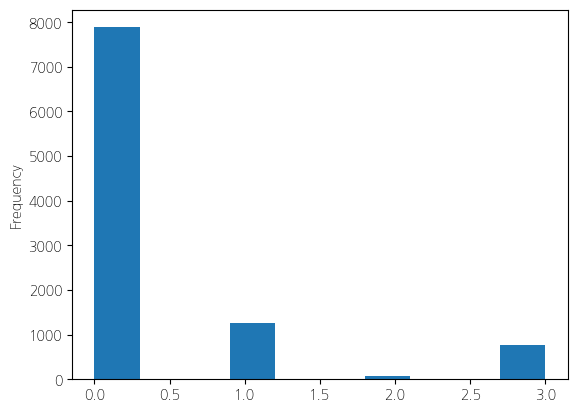

In [844]:
processed.plot(kind='hist', bins=10)

In [845]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [846]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 0.3732,
 'std': 0.843796752361568,
 'min': 0.0,
 '25%': 0.0,
 '50%': 0.0,
 '75%': 0.0,
 'max': 3.0}

In [847]:
output[col]['type'] = "ordinal" # ratio지만 처리는 ordinal
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.12 대출 목적

In [848]:
col = "대출 목적"

In [849]:
train[col].value_counts()

대출 목적
부채 통합        7294
기타            970
주택 개보수        909
사업 대출         254
여행 자금         173
의료비           158
자동차 구매         95
고액 구매          68
소규모 사업 자금      26
주택 구매          26
결혼 자금          14
휴가 비용           6
이사 비용           4
교육비             3
Name: count, dtype: int64

In [850]:
def preprocess_loanpurpose_formatting(x):
    return x

In [851]:
processed = train[col].apply(preprocess_loanpurpose_formatting)
processed.head()

0    부채 통합
1    부채 통합
2    부채 통합
3    부채 통합
4    부채 통합
Name: 대출 목적, dtype: object

<Axes: xlabel='대출 목적'>

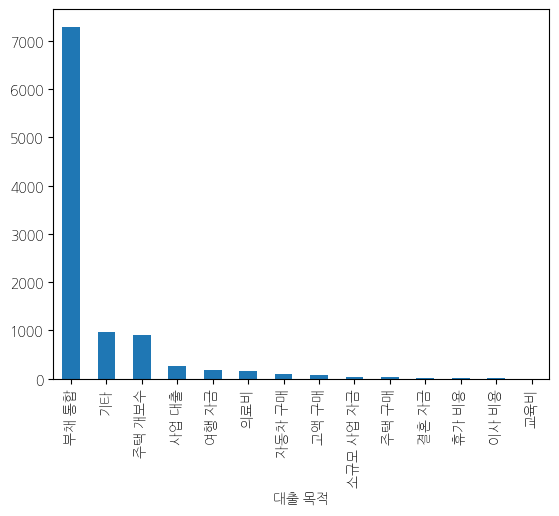

In [852]:
processed.value_counts().plot(kind='bar')

In [853]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [854]:
desc = processed.describe().to_dict()
desc

{'count': 10000, 'unique': 14, 'top': '부채 통합', 'freq': 7294}

In [855]:
output[col]['type'] = "nominal"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.13 대출 상환 기간

In [856]:
col = "대출 상환 기간"

In [857]:
train[col].value_counts()

대출 상환 기간
단기 상환    6975
장기 상환    3025
Name: count, dtype: int64

In [858]:
def preprocess_loanterm_formatting(x):
    return x

In [859]:
processed = train[col].apply(preprocess_loanterm_formatting)
processed.head()

0    단기 상환
1    단기 상환
2    단기 상환
3    단기 상환
4    장기 상환
Name: 대출 상환 기간, dtype: object

<Axes: xlabel='대출 상환 기간'>

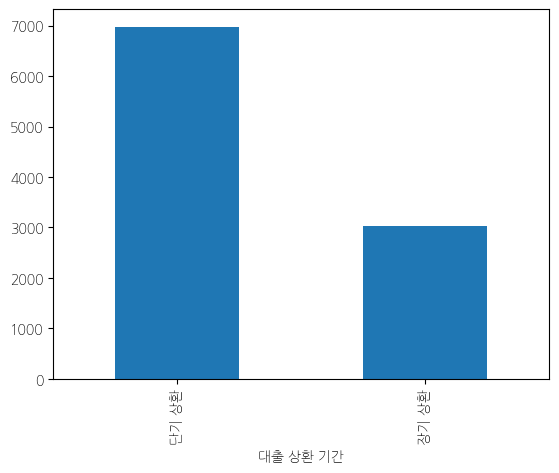

In [860]:
processed.value_counts().plot(kind='bar')

In [861]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [862]:
desc = processed.describe().to_dict()
desc

{'count': 10000, 'unique': 2, 'top': '단기 상환', 'freq': 6975}

In [863]:
output[col]['type'] = "nominal"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.14 현재 대출 잔액

In [864]:
col = "현재 대출 잔액"

In [865]:
train[col].value_counts()

현재 대출 잔액
500809.5    3
509760.0    3
421759.5    2
515760.0    2
254529.0    2
           ..
334506.0    1
641737.5    1
347431.5    1
404622.0    1
688386.0    1
Name: count, Length: 9897, dtype: int64

In [866]:
def preprocess_currentloanbalance_formatting(x):
    return x

In [867]:
processed = train[col].apply(preprocess_currentloanbalance_formatting)
processed.head()

0     390903.0
1    1002184.5
2     227775.0
3     251383.5
4    1163176.5
Name: 현재 대출 잔액, dtype: float64

<Axes: ylabel='Frequency'>

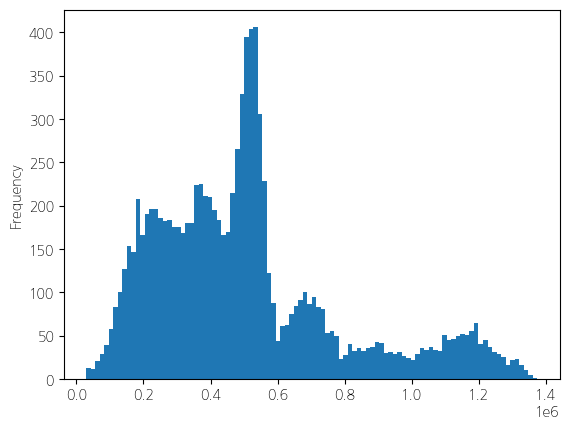

In [868]:
processed.plot(kind='hist', bins=100)

In [869]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [870]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 506120.0004,
 'std': 283146.23273463757,
 'min': 29176.5,
 '25%': 300190.125,
 '50%': 474341.25,
 '75%': 591907.875,
 'max': 1373613.0}

In [871]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.15 현재 미상환 신용액

In [872]:
col = "현재 미상환 신용액"

In [873]:
train[col].value_counts()

현재 미상환 신용액
0.0          129
157489.5       3
92344.5        2
214651.5       2
96697.5        2
            ... 
1145158.5      1
843543.0       1
297108.0       1
438084.0       1
99640.5        1
Name: count, Length: 9753, dtype: int64

In [874]:
def preprocess_unpaidcredit_formatting(x):
    return x

In [875]:
processed = train[col].apply(preprocess_unpaidcredit_formatting)
processed.head()

0    225457.5
1     64749.0
2    487644.0
3    413211.0
4     78991.5
Name: 현재 미상환 신용액, dtype: float64

<Axes: ylabel='Frequency'>

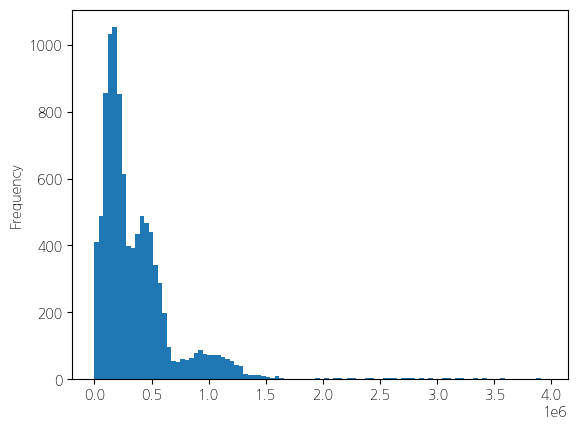

In [876]:
processed.plot(kind='hist', bins=100)

In [877]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [878]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 364912.6176,
 'std': 353794.16066855536,
 'min': 0.0,
 '25%': 147185.625,
 '50%': 254793.0,
 '75%': 474918.0,
 'max': 3946300.5}

In [879]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.16 월 상환 부채액

In [880]:
col = "월 상환 부채액"

In [881]:
train[col].value_counts()

월 상환 부채액
0.0        107
10011.0      4
10045.5      4
12771.0      4
9906.0       4
          ... 
27238.5      1
21442.5      1
4266.0       1
28657.5      1
57811.5      1
Name: count, Length: 8445, dtype: int64

In [882]:
def preprocess_monthlydeptpay_formatting(x):
    return x

In [883]:
processed = train[col].apply(preprocess_monthlydeptpay_formatting)
processed.head()

0     8806.5
1    24961.5
2    12069.0
3    31749.0
4     5862.0
Name: 월 상환 부채액, dtype: float64

<Axes: ylabel='Frequency'>

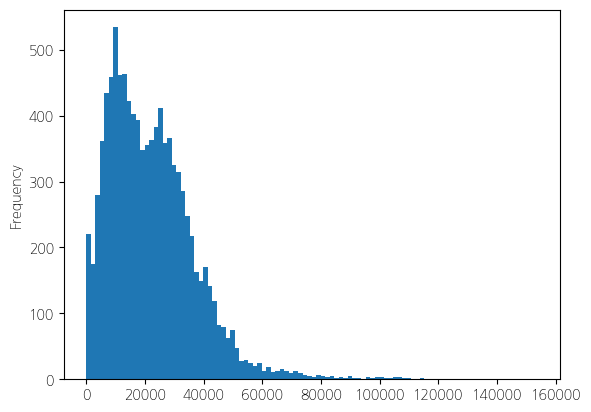

In [884]:
processed.plot(kind='hist', bins=100)

In [885]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [886]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 22367.28075,
 'std': 15186.497380119356,
 'min': 0.0,
 '25%': 10893.75,
 '50%': 20160.0,
 '75%': 30647.25,
 'max': 153574.5}

In [887]:
output[col]['type'] = "ratio"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc


### 4.2.17 신용 점수

In [888]:
col = "신용 점수"

In [889]:
train[col].value_counts()

신용 점수
796    349
798    329
795    288
793    284
800    284
      ... 
531      1
536      1
505      1
502      1
524      1
Name: count, Length: 171, dtype: int64

In [890]:
def preprocess_creditscore_formatting(x):
    return x

In [891]:
processed = train[col].apply(preprocess_creditscore_formatting)
processed.head()

0    767
1    767
2    800
3    796
4    751
Name: 신용 점수, dtype: int64

<Axes: ylabel='Frequency'>

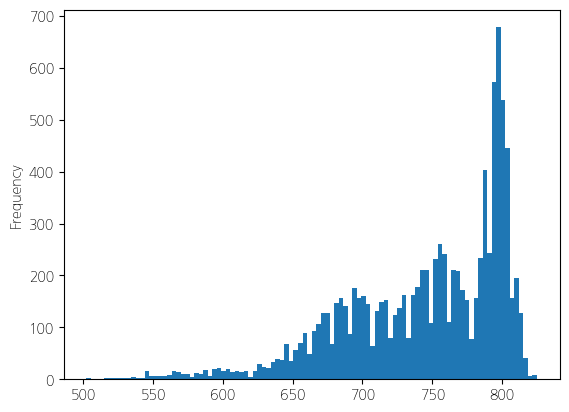

In [892]:
processed.plot(kind='hist', bins=100)

In [893]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [894]:
desc = processed.describe().to_dict()
desc

{'count': 10000.0,
 'mean': 744.215,
 'std': 56.99569831103569,
 'min': 502.0,
 '25%': 704.0,
 '50%': 756.0,
 '75%': 793.0,
 'max': 825.0}

In [895]:
output[col]['type'] = "interval"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

### 4.2.18 (target) 채무 불이행 여부

In [896]:
col = "채무 불이행 여부"

In [897]:
train[col].value_counts()

채무 불이행 여부
0    6588
1    3412
Name: count, dtype: int64

In [898]:
def preprocess_isdefault_formatting(x):
    return x

In [899]:
processed = train[col].apply(preprocess_isdefault_formatting)
processed.head()

0    0
1    0
2    1
3    1
4    0
Name: 채무 불이행 여부, dtype: int64

<Axes: xlabel='채무 불이행 여부'>

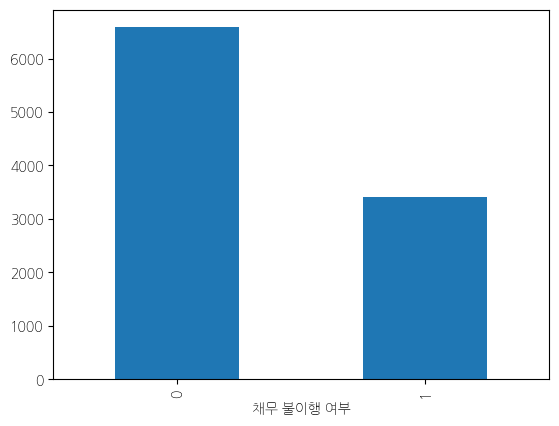

In [900]:
processed.value_counts().plot(kind='bar')

In [901]:
missingratio = float(processed.isna().sum()/len(train)*100)
missingratio

0.0

In [902]:
desc = processed.map(str).describe().to_dict()
desc

{'count': 10000, 'unique': 2, 'top': '0', 'freq': 6588}

In [903]:
output[col]['type'] = "nominal"
output[col]['missingratio'] = missingratio
output[col]['describe'] = desc

In [904]:
pd.DataFrame(output)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
type,interval,nominal,ratio,ordinal,ratio,ratio,ratio,ratio,ratio,ratio,ordinal,nominal,nominal,ratio,ratio,ratio,interval,nominal
missingratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
describe,"{'count': 10000.0, 'mean': 4999.5, 'std': 2886...","{'count': 10000, 'unique': 4, 'top': '월세', 'fr...","{'count': 10000.0, 'mean': 2163958.88415, 'std...","{'count': 10000, 'unique': 10, 'top': '10', 'f...","{'count': 10000.0, 'mean': 0.1993, 'std': 0.71...","{'count': 10000.0, 'mean': 12.2489, 'std': 4.6...","{'count': 10000.0, 'mean': 19.879360000000002,...","{'count': 10000.0, 'mean': 1175264.7378, 'std'...","{'count': 10000.0, 'mean': 0.6262, 'std': 1.23...","{'count': 10000.0, 'mean': 30.8892, 'std': 20....","{'count': 10000.0, 'mean': 0.3732, 'std': 0.84...","{'count': 10000, 'unique': 14, 'top': '부채 통합',...","{'count': 10000, 'unique': 2, 'top': '단기 상환', ...","{'count': 10000.0, 'mean': 506120.0004, 'std':...","{'count': 10000.0, 'mean': 364912.6176, 'std':...","{'count': 10000.0, 'mean': 22367.28075, 'std':...","{'count': 10000.0, 'mean': 744.215, 'std': 56....","{'count': 10000, 'unique': 2, 'top': '0', 'fre..."


## 4.3 formatting

In [905]:
import types

function_list = [name for name, obj in globals().items() if isinstance(obj, types.FunctionType) and 'preprocess' in name]
print(function_list)

['preprocess_uid_formatting', 'preprocess_housetype_formatting', 'preprocess_yearincome_formatting', 'preprocess_tenure_formatting', 'preprocess_seizurecount_formatting', 'preprocess_accountcount_formatting', 'preprocess_credityear_formatting', 'preprocess_creditlimit_formatting', 'preprocess_creditissuecount_formatting', 'preprocess_delinquencyfrom_formatting', 'preprocess_bankruptcycount_formatting', 'preprocess_loanpurpose_formatting', 'preprocess_loanterm_formatting', 'preprocess_currentloanbalance_formatting', 'preprocess_unpaidcredit_formatting', 'preprocess_monthlydeptpay_formatting', 'preprocess_creditscore_formatting', 'preprocess_isdefault_formatting']


In [906]:
import inspect

for i in function_list:
    code = inspect.getsource(eval(i)) 
    if 'return x' not in code:
        print(code)

def preprocess_uid_formatting(x):
    return int(x.replace("TRAIN_", ""))

def preprocess_tenure_formatting(x):
    return int(re.findall(r'\d+', x)[0])



In [907]:
def preprocess_uid_formatting(x):
    return int(x.replace("TRAIN_", ""))

def preprocess_tenure_formatting(x):
    return int(re.findall(r'\d+', x)[0])

def pipeline_0(df_):
    df = df_.copy()
    df['UID'] = df['UID'].apply(preprocess_uid_formatting)
    df.set_index("UID", inplace = True)
    df['현재 직장 근속 연수'] = df['현재 직장 근속 연수'].apply(preprocess_tenure_formatting)
    return df

In [908]:
formatted = pipeline_0(train)

In [909]:
formatted.head()

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
UID,,,,,,,,,,,,,,,,,
0,자가,1941337.5,10,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,월세,1979505.0,10,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,월세,1356381.0,4,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,월세,1049017.5,6,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,월세,4320217.5,2,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [949]:
import json

with open("EDA_result.json", "w") as f:
    json.dump(output, f, ensure_ascii = False)